In [1]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data_Brot"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (1462, 30)
Loaded Validation features dimensions: (357, 30)
Loaded Test features dimensions: (355, 30)

Loaded Training labels dimensions: (1462, 1)
Loaded Validation labels dimensions: (357, 1)
Loaded Test labels dimensions: (0, 1)

First few rows of loaded training features:
   Temp_Very_Cold_current  Temp_Cold_current  Temp_Mild_current  \
0                       0                  0                  1   
1                       0                  0                  1   
2                       0                  0                  0   
3                       0                  0                  1   
4                       0                  0                  1   

   Temp_Warm_current  Temp_Hot_current  Cloud_ok_current  \
0                  0                 0                 0   
1                  0                 0                 1   
2                  1                 0                 0   
3                  0                 0    

In [2]:
#Defining the Neural Network
#Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam # --> Optimierungsalgorithmus
import tensorflow as tf


#Sequential ermöglicht das Erstellen eines Modells mit einer Schicht nach der abnderen
#Dense sind die Schichten, die Eingaben mit Gewichten und einer Aktivierungsfunktion kombinieren
model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  Dropout(0.1),  
  #BatchNormalization(),
  Dense(64, activation='relu'),# --> 1. Schicht mit 10 Neuronen mit ReLU Aktivierungsfunktion (rectified linear unit), um Nichtlinearität in das Modell reinzubringen
  #Dropout(0.1),
  Dense(32, activation='relu'),
  Dense(1) # keine Aktivierugnsfunktion --> Regression (um kontinuierliche Were als Output zu erhalten)
])

model.summary()

2025-01-02 20:31:24.082365: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-02 20:31:24.083536: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-02 20:31:24.086473: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-02 20:31:24.095019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735849884.109409   21064 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735849884.11

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compiling and Training the model with mean squared Error (MSE) as loss function and adam optimizer
model.compile(loss="mse", optimizer=Adam(learning_rate=0.00142, beta_1=0.95, beta_2=0.95), metrics = ['mae']) # Mean Absolute Error zur Überwachung

history = model.fit(training_features, training_labels, epochs=26, 
                    batch_size = 32, 
                    verbose =1,
                    validation_data=(validation_features, validation_labels))

# Infos zum Output:
# 235/235 bedeutet, dass Datensatz in 235 Batches aufgeteilt wurde und alle Batches für diese Epoche verarbeitet wurden
#1s 2ms/step: Zeit, die für die gesamte Epoche benötigt wurde (1 Sekunde) und durchschnittlich 2 Millisekunden pro Schritt
#loss: 63840.3867: Der Trainingsverlust (Loss) nach dieser Epoche. Ein hoher Wert bedeutet, dass das Modell noch weit davon entfernt ist, optimale Vorhersagen zu treffen.
#val_loss: 51443.0977: Der Validierungsverlust (Loss) für diese Epoche. Das ist der Verlust auf den Validierungsdaten, die nicht für das Training verwendet werden, sondern zur Überprüfung der Modellleistung dienen

Epoch 1/26


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16059.1533 - mae: 120.6420 - val_loss: 16674.0938 - val_mae: 121.9937
Epoch 2/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14725.4111 - mae: 115.2005 - val_loss: 13638.3057 - val_mae: 108.9400
Epoch 3/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11484.1738 - mae: 100.2919 - val_loss: 7591.8262 - val_mae: 76.6083
Epoch 4/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5874.8398 - mae: 65.8490 - val_loss: 1979.0775 - val_mae: 31.8552
Epoch 5/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1782.2339 - mae: 32.5495 - val_loss: 1674.9064 - val_mae: 31.1143
Epoch 6/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1585.2550 - mae: 30.5359 - val_loss: 1397.2875 - val_mae: 26.8225
Epoch 7/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1203.2822 - mae: 26.6133 - val_loss: 1265.7296 - val_mae: 25.5331
Epoch 8/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1232.2898 - mae: 26.2444 - val_loss: 1171.1594 - val_mae: 24.5508
Epoch 9/2

In [4]:
# Saving the trained Model
model.save("python_model_Brot.h5")

In [5]:
# Making Predictions and Evaluating the Model
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

 1/46 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAPE on the Training Data: 18.22%
MAPE on the Validation Data: 17.95%


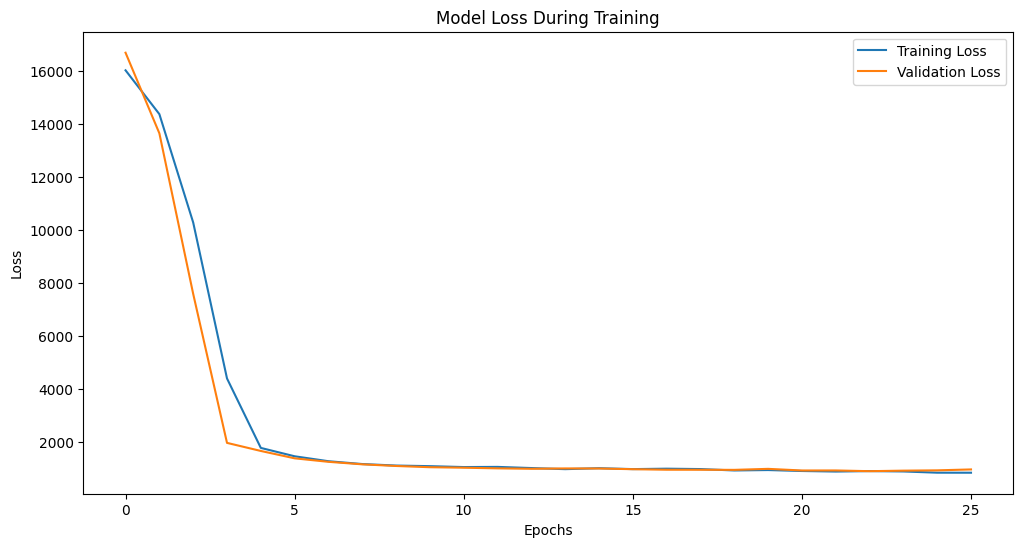

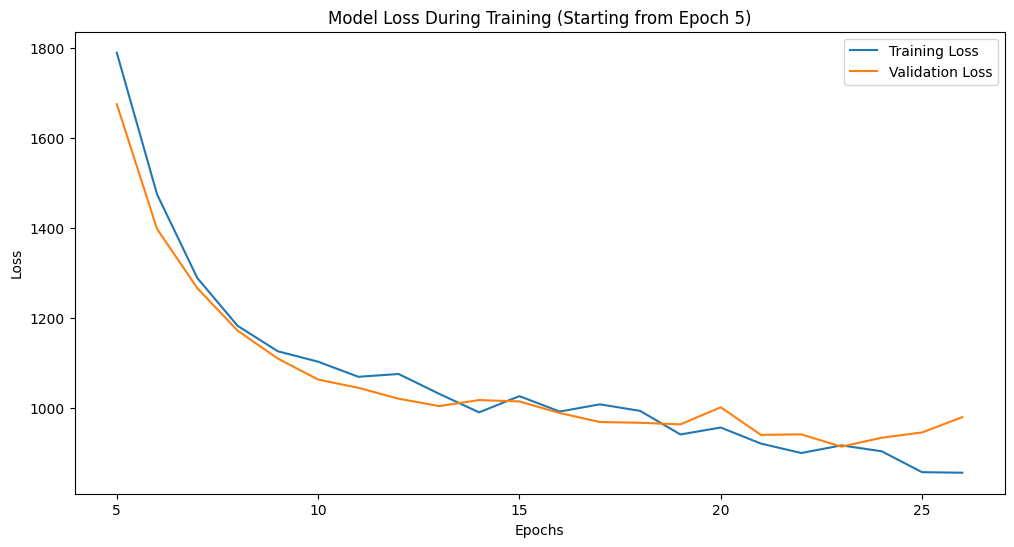

In [6]:
# Plotting Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training History (ab der 5. Epoche)
import matplotlib.pyplot as plt

# Schneide die Verlaufsdaten ab der 5. Epoche
epochs_to_plot = range(5, len(history.history['loss']) + 1)
training_loss = history.history['loss'][4:]
validation_loss = history.history['val_loss'][4:]

plt.figure(figsize=(12, 6))
plt.plot(epochs_to_plot, training_loss, label='Training Loss')
plt.plot(epochs_to_plot, validation_loss, label='Validation Loss')
plt.title('Model Loss During Training (Starting from Epoch 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


***VORHERSAGE TESTZEITRAUM***

In [7]:
test_predictions = model.predict(test_features)
#print("Predictions for test data:", test_predictions[:5])  # Display first 5 predictions
# Größe des Arrays anzeigen
print("Größe des Arrays (shape):", test_predictions.shape)
test_predictions = pd.DataFrame(test_predictions)
test_predictions

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Größe des Arrays (shape): (355, 1)


,0
0,135.104507
1,147.679031
2,140.655975
3,155.170258
4,86.698776
...,...
350,136.340332
351,156.563980
352,88.618835
353,141.522278


In [8]:
data_test = pd.read_csv("/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/data_with_lag/Testdaten_with_lag.csv")
data_test = data_test[data_test["Warengruppe_1"] == 1]
data_test

,id,Datum,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold_current,Temp_Very_Cold_prev,...,zwischen_den_jahren_next,Number_of_ships_scaled_current,Number_of_ships_scaled_prev,Number_of_ships_scaled_next,Cloud_ok_current,Cloud_ok_prev,Cloud_ok_next,Wind_ok_current,Wind_ok_prev,Wind_ok_next
0,1808011,2018-08-01,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1,1.0,1.0,1,1.0,1.0
1,1808021,2018-08-02,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1,1.0,1.0,1,1.0,1.0
2,1808031,2018-08-03,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.2,1,1.0,1.0,1,1.0,1.0
3,1808041,2018-08-04,1,0,0,0,0,0,0,0.0,...,0.0,0.2,0.0,0.0,1,1.0,0.0,1,1.0,1.0
4,1808051,2018-08-05,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.2,0.0,0,1.0,1.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1907261,2019-07-26,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.2,0.6,1,0.0,1.0,1,1.0,0.0
351,1907271,2019-07-27,1,0,0,0,0,0,0,0.0,...,0.0,0.6,0.0,0.4,1,1.0,1.0,0,1.0,1.0
352,1907281,2019-07-28,1,0,0,0,0,0,0,0.0,...,0.0,0.4,0.6,0.2,1,1.0,0.0,1,0.0,1.0
353,1907291,2019-07-29,1,0,0,0,0,0,0,0.0,...,0.0,0.2,0.4,0.2,0,1.0,0.0,1,1.0,1.0


In [9]:
# Erstelle Ziel csv Datei

predictions_df = pd.DataFrame({
    'id': data_test['id'].values,
    'Umsatz': test_predictions[0].values
}).reset_index(drop=True)

# Save to a CSV file
#output_csv_path = "/workspaces/bakery_sales_prediction/3_Model/02_Franz/V3_lag/Umsatzvorhersage_Broetchen_Hochladeformat.csv"

predictions_df.to_csv('Brot_Umsatzvorhersage.csv', index=False)
print(f"CSV Datei erstellt")

CSV Datei erstellt
